In [3]:
#import requited libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#import image data
from imutils import paths
image_paths = list(paths.list_images('/content/drive/MyDrive/Colab Notebooks/data'))

In [7]:
len(image_paths)

4190

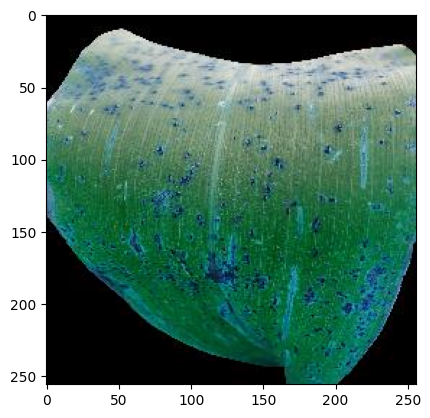

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(image_paths[1069])
plt.imshow(image)

In [9]:
def image_data_preprocesing(image_data_path):
  image_paths=list(paths.list_images(image_data_path))
  #print(image_paths[0])
  image_num_data=list()
  for i in range(len(image_paths)):
    image=cv2.imread(image_paths[i])

    #resizing the image
    image_re=cv2.resize(src=image,dsize=(300,300),interpolation=cv2.INTER_LINEAR)
    image_nd=np.array(image_re)
    image_flatten=image_nd.flatten()

    image_num_data.append(image_flatten)
    image_num_array=np.array(image_num_data)
    df=pd.DataFrame(image_num_array)
  return df

In [10]:
Blight_data=image_data_preprocesing('/content/drive/MyDrive/Colab Notebooks/data/Blight')
common_Rust=image_data_preprocesing('/content/drive/MyDrive/Colab Notebooks/data/Common_Rust')
Gray_Leaf_Spot=image_data_preprocesing('/content/drive/MyDrive/Colab Notebooks/data/Gray_Leaf_Spot')
Healthy=image_data_preprocesing('/content/drive/MyDrive/Colab Notebooks/data/Healthy')

In [11]:
Blight_data['target']="Blight"
common_Rust['target']="common_Rust"
Gray_Leaf_Spot['target']="Gray_Leaf_Spot"
Healthy['target']="Healthy"

In [12]:
Blight_data

,0,1,2,3,4,5,6,7,8,9,...,269991,269992,269993,269994,269995,269996,269997,269998,269999,target
0,66,113,121,58,105,113,74,119,131,66,...,37,80,49,37,81,52,29,74,47,Blight
1,114,126,108,123,153,135,133,172,153,126,...,83,108,80,80,107,78,77,105,76,Blight
2,124,115,128,123,114,127,122,113,126,122,...,125,121,125,124,120,124,122,118,123,Blight
3,30,99,108,37,106,115,38,109,117,41,...,79,106,148,77,101,147,77,101,147,Blight
4,102,95,108,100,96,108,92,91,104,78,...,43,78,52,47,82,56,54,89,63,Blight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,120,147,114,118,145,112,112,137,105,107,...,177,160,169,182,165,174,181,164,173,Blight
1142,135,121,125,132,118,122,130,116,120,129,...,101,137,156,102,140,158,133,171,189,Blight
1143,25,68,55,40,80,68,53,91,80,64,...,134,121,128,133,120,128,132,119,127,Blight
1144,212,183,252,207,179,247,209,180,249,210,...,96,108,93,102,112,96,107,118,98,Blight


In [13]:
df = pd.concat([Blight_data, common_Rust,Gray_Leaf_Spot,Healthy], axis=0)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,269991,269992,269993,269994,269995,269996,269997,269998,269999,target
0,66,113,121,58,105,113,74,119,131,66,...,37,80,49,37,81,52,29,74,47,Blight
1,114,126,108,123,153,135,133,172,153,126,...,83,108,80,80,107,78,77,105,76,Blight
2,124,115,128,123,114,127,122,113,126,122,...,125,121,125,124,120,124,122,118,123,Blight
3,30,99,108,37,106,115,38,109,117,41,...,79,106,148,77,101,147,77,101,147,Blight
4,102,95,108,100,96,108,92,91,104,78,...,43,78,52,47,82,56,54,89,63,Blight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,82,139,76,81,138,75,80,137,74,79,...,51,138,74,50,138,74,49,139,74,Healthy
1159,118,131,87,119,132,88,120,132,88,120,...,123,149,103,121,147,101,128,154,108,Healthy
1160,143,180,130,140,177,127,135,172,122,130,...,112,118,71,110,116,69,108,114,67,Healthy
1161,161,180,141,161,180,141,161,180,141,161,...,91,125,88,86,120,83,81,115,78,Healthy


In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
#split train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3352, 270000)
(838, 270000)
(3352,)
(838,)


In [18]:
# apply decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier()
dt
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

DecisionTreeClassifier()

In [19]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6873508353221957


In [21]:
import pickle

pickle.dump(dt, open("corn_or_maize.pkl", "wb"))